In [368]:
%matplotlib inline
from utility import *

In [367]:
from featurization import *
import pandas as pd 
import numpy as np


train = pd.read_csv('Joel\\datasets\\sds\\train.csv')
test = pd.read_csv('Joel\\datasets\\sds\\test.csv')
train_features, test_features, feature_names = featurize(train, test, 'tfidf_glove')

Emoji re....
Num dots....
Punctuation....
Sentiment Scores....
Text Features....
Glove.....


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

DONE!


GridSearchCV HelperFunction

In [3]:
y_train = np.where(train.neuro_bin.values == 1, 1, 0)
y_test = np.where(test.neuro_bin.values == 1, 1, 0)

In [4]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics import make_scorer
from scipy import sparse


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


def adjusted_f1(y_true, y_prob):
    f1 = print_model_metrics(y_true, y_prob, verbose = 0, return_metrics = True)[0]
    return f1

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)



# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

def run_grid_search(model, params, x_train, y_train):
    grid = GridSearchCV(model, params, cv = ps, n_jobs = -1, scoring = score, verbose = 0, refit = False)
    grid.fit(x_train, y_train)
    return (grid.best_params_, grid.best_score_)

In [5]:
# Run log reg n times and average the metrics
def fit_n_times(model, x_train, y_train, x_test, y_test, n_iters = 10):
    metrics = np.zeros(5)
    for _ in range(n_iters):
        model.fit(x_train, y_train)
        y_test_prob = model.predict_proba(x_test)[:,1]
        metrics += print_model_metrics(y_test, y_test_prob, verbose = False, return_metrics = True)
    metrics /=10
    print('F1: {:.3f} | Pr: {:.3f} | Re: {:.3f} | AUC: {:.3f} | Accuracy: {:.3f} \n'.format(*metrics))

## LogReg

#### Neuroticism

In [ ]:
from sklearn.linear_model import SGDClassifier

lr = SGDClassifier(loss = 'log')
lr_params = {'alpha' : [10**(-x) for x in range(7)],
             'penalty' : ['l1', 'l2', 'elasticnet'],
             'l1_ratio' : [0.15, 0.25, 0.5, 0.75]}

best_params, best_f1 = run_grid_search(lr, lr_params, X, y)

print('Best Parameters : {}'.format(best_params))

lr = SGDClassifier(loss = 'log', 
                   alpha = best_params['alpha'], 
                   penalty = best_params['penalty'], 
                   l1_ratio = best_params['l1_ratio'])
fit_n_times(lr, train_features, y_train, test_features, y_test)

Best Parameters : {'alpha': 1, 'l1_ratio': 0.15, 'penalty': 'l2'}
F1: 0.824 | Pr: 0.800 | Re: 1.000 | AUC: 0.883 | Accuracy: 0.812 



It selected a VERY HIGH alpha value, which indicates large amounts of regularization. This is because the small dataset overfits easily.

#### Extraversion

In [223]:
y_train = np.where(train.extra_bin.values == 1, 1, 0)
y_test = np.where(test.extra_bin.values == 1, 1, 0)

In [224]:
score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)


In [225]:
lr = SGDClassifier(loss = 'log')
lr_params = {'alpha' : [10**(-x) for x in range(7)],
             'penalty' : ['l1', 'l2', 'elasticnet'],
             'l1_ratio' : [0.15, 0.25, 0.5, 0.75]}

best_params, best_f1 = run_grid_search(lr, lr_params, X, y)

print('Best Parameters : {}'.format(best_params))

lr = SGDClassifier(loss = 'log', 
                   alpha = best_params['alpha'], 
                   penalty = best_params['penalty'], 
                   l1_ratio = best_params['l1_ratio'])
fit_n_times(lr, train_features, y_train, test_features, y_test)

Best Parameters : {'alpha': 0.01, 'l1_ratio': 0.75, 'penalty': 'l2'}
F1: 0.829 | Pr: 0.887 | Re: 0.943 | AUC: 0.952 | Accuracy: 0.856 



#### Openness

In [386]:
y_train = np.where(train.off_bin.values == 1, 1, 0)
y_test = np.where(test.off_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

lr = SGDClassifier(loss = 'log')
lr_params = {'alpha' : [10**(-x) for x in range(7)],
             'penalty' : ['l1', 'l2', 'elasticnet'],
             'l1_ratio' : [0.15, 0.25, 0.5, 0.75]}

best_params, best_f1 = run_grid_search(lr, lr_params, X, y)

print('Best Parameters : {}'.format(best_params))

lr = SGDClassifier(loss = 'log', 
                   alpha = best_params['alpha'], 
                   penalty = best_params['penalty'], 
                   l1_ratio = best_params['l1_ratio'])
fit_n_times(lr, train_features, y_train, test_features, y_test)

Best Parameters : {'alpha': 0.001, 'l1_ratio': 0.25, 'penalty': 'l1'}
F1: 0.574 | Pr: 0.511 | Re: 0.914 | AUC: 0.587 | Accuracy: 0.500 



#### Agreeableness

In [ ]:
y_train = np.where(train.ver_bin.values == 1, 1, 0)
y_test = np.where(test.ver_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

lr = SGDClassifier(loss = 'log')
lr_params = {'alpha' : [10**(-x) for x in range(7)],
             'penalty' : ['l1', 'l2', 'elasticnet'],
             'l1_ratio' : [0.15, 0.25, 0.5, 0.75]}

best_params, best_f1 = run_grid_search(lr, lr_params, X, y)

print('Best Parameters : {}'.format(best_params))

lr = SGDClassifier(loss = 'log', 
                   alpha = best_params['alpha'], 
                   penalty = best_params['penalty'], 
                   l1_ratio = best_params['l1_ratio'])
fit_n_times(lr, train_features, y_train, test_features, y_test)

Best Parameters : {'alpha': 1, 'l1_ratio': 0.15, 'penalty': 'l2'}
F1: 0.815 | Pr: 0.764 | Re: 1.000 | AUC: 0.712 | Accuracy: 0.744 



#### Conscientousness

In [ ]:
y_train = np.where(train.gew_bin.values == 1, 1, 0)
y_test = np.where(test.gew_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

lr = SGDClassifier(loss = 'log')
lr_params = {'alpha' : [10**(-x) for x in range(7)],
             'penalty' : ['l1', 'l2', 'elasticnet'],
             'l1_ratio' : [0.15, 0.25, 0.5, 0.75]}

best_params, best_f1 = run_grid_search(lr, lr_params, X, y)

print('Best Parameters : {}'.format(best_params))

lr = SGDClassifier(loss = 'log', 
                   alpha = best_params['alpha'], 
                   penalty = best_params['penalty'], 
                   l1_ratio = best_params['l1_ratio'])
fit_n_times(lr, train_features, y_train, test_features, y_test)

Best Parameters : {'alpha': 0.1, 'l1_ratio': 0.25, 'penalty': 'elasticnet'}
F1: 0.674 | Pr: 0.695 | Re: 0.811 | AUC: 0.643 | Accuracy: 0.619 



## SVM

## Naive Bayes

### Neuroticism


In [ ]:
from sklearn.naive_bayes import MultinomialNB

y_train = np.where(train.neuro_bin.values == 1, 1, 0)
y_test = np.where(test.neuro_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)


nb = MultinomialNB(class_prior = [0.5, 0.5])
nb_params = {'alpha' : [10**(x) for x in range(6)]}


best_params, best_f1 = run_grid_search(nb, nb_params, X, y)

print('Best Parameters : {}'.format(best_params))
print('Best F1 : {}'.format(best_f1))

nb = MultinomialNB(alpha = best_params['alpha'], class_prior = [0.5, 0.5])

fit_n_times(nb, train_features, y_train, test_features, y_test)



Best Parameters : {'alpha': 1}
Best F1 : 0.823529411764706
F1: 0.824 | Pr: 0.800 | Re: 1.000 | AUC: 0.906 | Accuracy: 0.812 



### Extraversion

In [ ]:
y_train = np.where(train.extra_bin.values == 1, 1, 0)
y_test = np.where(test.extra_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)


nb = MultinomialNB(class_prior = [0.5, 0.5])
nb_params = {'alpha' : [10**(x) for x in range(6)]}


best_params, best_f1 = run_grid_search(nb, nb_params, X, y)

print('Best Parameters : {}'.format(best_params))
print('Best F1 : {}'.format(best_f1))

nb = MultinomialNB(alpha = best_params['alpha'], class_prior = [0.5, 0.5])

fit_n_times(nb, train_features, y_train, test_features, y_test)


Best Parameters : {'alpha': 1000}
Best F1 : 0.75
F1: 0.750 | Pr: 0.700 | Re: 1.000 | AUC: 0.889 | Accuracy: 0.750 



### Openness

In [ ]:
y_train = np.where(train.off_bin.values == 1, 1, 0)
y_test = np.where(test.off_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)


nb = MultinomialNB(class_prior = [0.5, 0.5])
nb_params = {'alpha' : [10**(x) for x in range(6)]}


best_params, best_f1 = run_grid_search(nb, nb_params, X, y)

print('Best Parameters : {}'.format(best_params))
print('Best F1 : {}'.format(best_f1))

nb = MultinomialNB(alpha = best_params['alpha'], class_prior = [0.5, 0.5])

fit_n_times(nb, train_features, y_train, test_features, y_test)

### Agreeableness

In [ ]:
y_train = np.where(train.ver_bin.values == 1, 1, 0)
y_test = np.where(test.ver_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)


nb = MultinomialNB(class_prior = [0.5, 0.5])
nb_params = {'alpha' : [10**(x) for x in range(6)]}


best_params, best_f1 = run_grid_search(nb, nb_params, X, y)

print('Best Parameters : {}'.format(best_params))
print('Best F1 : {}'.format(best_f1))

nb = MultinomialNB(alpha = best_params['alpha'], class_prior = [0.5, 0.5])

fit_n_times(nb, train_features, y_train, test_features, y_test)


Best Parameters : {'alpha': 1}
Best F1 : 0.8181818181818182
F1: 0.818 | Pr: 0.769 | Re: 1.000 | AUC: 0.750 | Accuracy: 0.750 



### Conscientousness

In [285]:
y_train = np.where(train.gew_bin.values == 1, 1, 0)
y_test = np.where(test.gew_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)


nb = MultinomialNB(class_prior = [0.5, 0.5])
nb_params = {'alpha' : [10**(x) for x in range(6)]}


best_params, best_f1 = run_grid_search(nb, nb_params, X, y)

print('Best Parameters : {}'.format(best_params))
print('Best F1 : {}'.format(best_f1))

nb = MultinomialNB(alpha = best_params['alpha'], class_prior = [0.5, 0.5])

fit_n_times(nb, train_features, y_train, test_features, y_test)


Best Parameters : {'alpha': 1}
Best F1 : 0.6666666666666667
F1: 0.667 | Pr: 0.562 | Re: 1.000 | AUC: 0.413 | Accuracy: 0.500 



## KNN

### Neuroticism

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train = np.where(train.neuro_bin.values == 1, 1, 0)
y_test = np.where(test.neuro_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

knn = KNeighborsClassifier(n_jobs = -1)

knn_params = { 'n_neighbors' : [3, 5, 7, 9, 15, 31], 
               'weights' : ['uniform', 'distance']
}

best_params, best_f1 = run_grid_search(knn, knn_params, X, y)
print('Best Parameters : {}'.format(best_params))

knn = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], weights = best_params['weights'], n_jobs = -1)

fit_n_times(knn, train_features, y_train, test_features, y_test)

Best Parameters : {'n_neighbors': 9, 'weights': 'distance'}
F1: 0.875 | Pr: 0.889 | Re: 1.000 | AUC: 0.938 | Accuracy: 0.875 



### Extraversion

In [ ]:
y_train = np.where(train.extra_bin.values == 1, 1, 0)
y_test = np.where(test.extra_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

knn = KNeighborsClassifier(n_jobs = -1)

knn_params = { 'n_neighbors' : [3, 5, 7, 9, 15, 31], 
               'weights' : ['uniform', 'distance']
}

best_params, best_f1 = run_grid_search(knn, knn_params, X, y)
print('Best Parameters : {}'.format(best_params))

knn = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], weights = best_params['weights'], n_jobs = -1)

fit_n_times(knn, train_features, y_train, test_features, y_test)

Best Parameters : {'n_neighbors': 3, 'weights': 'distance'}
F1: 0.667 | Pr: 0.667 | Re: 0.857 | AUC: 0.762 | Accuracy: 0.688 



### Openness

In [287]:
y_train = np.where(train.off_bin.values == 1, 1, 0)
y_test = np.where(test.off_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

knn = KNeighborsClassifier(n_jobs = -1)

knn_params = { 'n_neighbors' : [3, 5, 7, 9, 15, 31], 
               'weights' : ['uniform', 'distance']
}

best_params, best_f1 = run_grid_search(knn, knn_params, X, y)
print('Best Parameters : {}'.format(best_params))

knn = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], weights = best_params['weights'], n_jobs = -1)

fit_n_times(knn, train_features, y_train, test_features, y_test)

Best Parameters : {'n_neighbors': 7, 'weights': 'uniform'}
F1: 0.600 | Pr: 0.438 | Re: 1.000 | AUC: 0.444 | Accuracy: 0.500 



### Agreeableness

In [ ]:
y_train = np.where(train.ver_bin.values == 1, 1, 0)
y_test = np.where(test.ver_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

knn = KNeighborsClassifier(n_jobs = -1)

knn_params = { 'n_neighbors' : [3, 5, 7, 9, 15, 31], 
               'weights' : ['uniform', 'distance']
}

best_params, best_f1 = run_grid_search(knn, knn_params, X, y)
print('Best Parameters : {}'.format(best_params))

knn = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], weights = best_params['weights'], n_jobs = -1)

fit_n_times(knn, train_features, y_train, test_features, y_test)

Best Parameters : {'n_neighbors': 31, 'weights': 'distance'}
F1: 0.800 | Pr: 0.818 | Re: 0.900 | AUC: 0.817 | Accuracy: 0.750 



### Conscientousness

In [ ]:
y_train = np.where(train.gew_bin.values == 1, 1, 0)
y_test = np.where(test.gew_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

knn = KNeighborsClassifier(n_jobs = -1)

knn_params = { 'n_neighbors' : [3, 5, 7, 9, 15, 31], 
               'weights' : ['uniform', 'distance']
}

best_params, best_f1 = run_grid_search(knn, knn_params, X, y)
print('Best Parameters : {}'.format(best_params))

knn = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'], weights = best_params['weights'], n_jobs = -1)

fit_n_times(knn, train_features, y_train, test_features, y_test)

Best Parameters : {'n_neighbors': 5, 'weights': 'uniform'}
F1: 0.696 | Pr: 0.562 | Re: 1.000 | AUC: 0.516 | Accuracy: 0.562 



## XGBoost

### Neuroticism

In [ ]:
from xgboost import XGBClassifier

y_train = np.where(train.neuro_bin.values == 1, 1, 0)
y_test = np.where(test.neuro_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

xgb = XGBClassifier(n_jobs = -1)

xgb_params = { 'n_estimators' : [10, 100, 200, 500], 
               'max_depth' : [1, 2, 3, 7],
               'learning_rate' : [0.1, 0.2, 0.01, 0.3],
               'reg_alpha' : [0, 0.1, 0.2]
}

best_params, best_f1 = run_grid_search(xgb, xgb_params, X, y)

print('Best Parameters : {}'.format(best_params))
xgb = XGBClassifier(n_estimators = best_params['n_estimators'],
                            learning_rate = best_params['learning_rate'],
                            max_depth = best_params['max_depth'], 
                            reg_alpha = best_params['reg_alpha'], 
                            n_jobs = -1)
fit_n_times(xgb, train_features, y_train, test_features, y_test)

Best Parameters : {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 10, 'reg_alpha': 0}
F1: 0.636 | Pr: 0.533 | Re: 1.000 | AUC: 0.359 | Accuracy: 0.500 



### Extraversion

In [ ]:
y_train = np.where(train.extra_bin.values == 1, 1, 0)
y_test = np.where(test.extra_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

xgb = XGBClassifier(n_jobs = -1)

xgb_params = { 'n_estimators' : [10, 100, 200, 500], 
               'max_depth' : [1, 2, 3, 7],
               'learning_rate' : [0.1, 0.2, 0.01, 0.3],
               'reg_alpha' : [0, 0.1, 0.2]
}

best_params, best_f1 = run_grid_search(xgb, xgb_params, X, y)

print('Best Parameters : {}'.format(best_params))
xgb = XGBClassifier(n_estimators = best_params['n_estimators'],
                            learning_rate = best_params['learning_rate'],
                            max_depth = best_params['max_depth'], 
                            reg_alpha = best_params['reg_alpha'], 
                            n_jobs = -1)
fit_n_times(xgb, train_features, y_train, test_features, y_test)

Best Parameters : {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'reg_alpha': 0}
F1: 0.800 | Pr: 0.778 | Re: 1.000 | AUC: 0.921 | Accuracy: 0.812 



### Openness

In [ ]:
y_train = np.where(train.off_bin.values == 1, 1, 0)
y_test = np.where(test.off_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

xgb = XGBClassifier(n_jobs = -1)

xgb_params = { 'n_estimators' : [10, 100, 200, 500], 
               'max_depth' : [1, 2, 3, 7],
               'learning_rate' : [0.1, 0.2, 0.01, 0.3],
               'reg_alpha' : [0, 0.1, 0.2]
}

best_params, best_f1 = run_grid_search(xgb, xgb_params, X, y)

print('Best Parameters : {}'.format(best_params))
xgb = XGBClassifier(n_estimators = best_params['n_estimators'],
                            learning_rate = best_params['learning_rate'],
                            max_depth = best_params['max_depth'], 
                            reg_alpha = best_params['reg_alpha'], 
                            n_jobs = -1)
fit_n_times(xgb, train_features, y_train, test_features, y_test)

Best Parameters : {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10, 'reg_alpha': 0}
F1: 0.571 | Pr: 0.438 | Re: 1.000 | AUC: 0.381 | Accuracy: 0.438 



### Agreeablness

In [ ]:
y_train = np.where(train.ver_bin.values == 1, 1, 0)
y_test = np.where(test.ver_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

xgb = XGBClassifier(n_jobs = -1)

xgb_params = { 'n_estimators' : [10, 100, 200, 500], 
               'max_depth' : [1, 2, 3, 7],
               'learning_rate' : [0.1, 0.2, 0.01, 0.3],
               'reg_alpha' : [0, 0.1, 0.2]
}

best_params, best_f1 = run_grid_search(xgb, xgb_params, X, y)

print('Best Parameters : {}'.format(best_params))
xgb = XGBClassifier(n_estimators = best_params['n_estimators'],
                            learning_rate = best_params['learning_rate'],
                            max_depth = best_params['max_depth'], 
                            reg_alpha = best_params['reg_alpha'], 
                            n_jobs = -1)
fit_n_times(xgb, train_features, y_train, test_features, y_test)

Best Parameters : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10, 'reg_alpha': 0}
F1: 0.783 | Pr: 0.714 | Re: 1.000 | AUC: 0.500 | Accuracy: 0.688 



### Conscientousness

In [ ]:
y_train = np.where(train.gew_bin.values == 1, 1, 0)
y_test = np.where(test.gew_bin.values == 1, 1, 0)

score = make_scorer(adjusted_f1, greater_is_better = True, needs_proba = True)

# Since we want to use a predefined Test/Val set, we'll use PredefinedSplit and pass it as the CV parameter
# We need to merge both the datasets and label 0 for test and -1 for the train set

X = sparse.vstack((train_features, test_features))
test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]
y = np.concatenate([y_train, y_test])
ps = PredefinedSplit(test_fold)

xgb = XGBClassifier(n_jobs = -1)

xgb_params = { 'n_estimators' : [10, 100, 200, 500], 
               'max_depth' : [1, 2, 3, 7],
               'learning_rate' : [0.1, 0.2, 0.01, 0.3],
               'reg_alpha' : [0, 0.1, 0.2]
}

best_params, best_f1 = run_grid_search(xgb, xgb_params, X, y)

print('Best Parameters : {}'.format(best_params))
xgb = XGBClassifier(n_estimators = best_params['n_estimators'],
                            learning_rate = best_params['learning_rate'],
                            max_depth = best_params['max_depth'], 
                            reg_alpha = best_params['reg_alpha'], 
                            n_jobs = -1)
fit_n_times(xgb, train_features, y_train, test_features, y_test)

Best Parameters : {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 10, 'reg_alpha': 0}
F1: 0.727 | Pr: 0.643 | Re: 1.000 | AUC: 0.603 | Accuracy: 0.625 



### DL Tabular Data (MLP)


### Neuroticism

In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size = 128
epochs = 40

simple_nn = Sequential()
simple_nn.add(Dense(150, activation='relu', input_shape=(309,)))
simple_nn.add(Dropout(0.2))
simple_nn.add(Dense(100, activation='relu'))
simple_nn.add(Dropout(0.2))
simple_nn.add(Dense(1, activation='sigmoid'))

simple_nn.summary()

simple_nn.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

y_train = np.where(train.neuro_bin.values == 1, 1, 0)
y_test = np.where(test.neuro_bin.values == 1, 1, 0)

checkpoint = ModelCheckpoint('Joel\\saved_models\\dl_neuro', monitor = 'val_accuracy', verbose = 1, save_best_only=True)
history = simple_nn.fit(train_features.todense(), y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [checkpoint],
                    validation_data=(test_features.todense(), y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               46500     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 61,701
Trainable params: 61,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - ET

In [170]:
from tensorflow.keras.models import load_model

simple_nn = load_model('Joel\\saved_models\\dl_neuro')

y_pred_prob = simple_nn.predict(test_features.todense())
print_model_metrics(y_test, y_pred_prob)

1/1 [==============================] - 0s 64ms/step
F1: 0.875 | Pr: 0.889 | Re: 1.000 | AUC: 0.922 | Accuracy: 0.875 



### Extraversion

In [ ]:
y_train = np.where(train.extra_bin.values == 1, 1, 0)
y_test = np.where(test.extra_bin.values == 1, 1, 0)

checkpoint = ModelCheckpoint('Joel\\saved_models\\dl_extra', monitor = 'val_accuracy', verbose = 1, save_best_only=True)
history = simple_nn.fit(train_features.todense(), y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [checkpoint],
                    validation_data=(test_features.todense(), y_test))

Epoch 1/40
1/1 [==============================] - ETA: 0s - loss: 0.7088 - accuracy: 0.5312
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to Joel\saved_models\dl_extra
INFO:tensorflow:Assets written to: Joel\saved_models\dl_extra\assets
1/1 [==============================] - 1s 955ms/step - loss: 0.7088 - accuracy: 0.5312 - val_loss: 0.7996 - val_accuracy: 0.4375
Epoch 2/40
1/1 [==============================] - ETA: 0s - loss: 0.7491 - accuracy: 0.5781
Epoch 2: val_accuracy did not improve from 0.43750
1/1 [==============================] - 0s 30ms/step - loss: 0.7491 - accuracy: 0.5781 - val_loss: 0.7804 - val_accuracy: 0.4375
Epoch 3/40
1/1 [==============================] - ETA: 0s - loss: 0.7167 - accuracy: 0.5625
Epoch 3: val_accuracy did not improve from 0.43750
1/1 [==============================] - 0s 33ms/step - loss: 0.7167 - accuracy: 0.5625 - val_loss: 0.7229 - val_accuracy: 0.4375
Epoch 4/40
1/1 [==============================] - ETA: 0s - loss: 0.6955

In [ ]:
simple_nn = load_model('Joel\\saved_models\\dl_extra')

y_pred_prob = simple_nn.predict(test_features.todense())
print_model_metrics(y_test, y_pred_prob)

1/1 [==============================] - 0s 40ms/step
F1: 0.667 | Pr: 0.583 | Re: 1.000 | AUC: 0.698 | Accuracy: 0.625 



### Openness

In [171]:
y_train = np.where(train.off_bin.values == 1, 1, 0)
y_test = np.where(test.off_bin.values == 1, 1, 0)

checkpoint = ModelCheckpoint('Joel\\saved_models\\dl_open', monitor = 'val_accuracy', verbose = 1, save_best_only=True)
history = simple_nn.fit(train_features.todense(), y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [checkpoint],
                    validation_data=(test_features.todense(), y_test))

Epoch 1/40
1/1 [==============================] - ETA: 0s - loss: 0.7840 - accuracy: 0.4219
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to Joel\saved_models\dl_open
INFO:tensorflow:Assets written to: Joel\saved_models\dl_open\assets
1/1 [==============================] - 1s 1s/step - loss: 0.7840 - accuracy: 0.4219 - val_loss: 0.6464 - val_accuracy: 0.6250
Epoch 2/40
1/1 [==============================] - ETA: 0s - loss: 0.7341 - accuracy: 0.4844
Epoch 2: val_accuracy did not improve from 0.62500
1/1 [==============================] - 0s 31ms/step - loss: 0.7341 - accuracy: 0.4844 - val_loss: 0.6545 - val_accuracy: 0.6250
Epoch 3/40
1/1 [==============================] - ETA: 0s - loss: 0.6989 - accuracy: 0.5469
Epoch 3: val_accuracy did not improve from 0.62500
1/1 [==============================] - 0s 32ms/step - loss: 0.6989 - accuracy: 0.5469 - val_loss: 0.6614 - val_accuracy: 0.6250
Epoch 4/40
1/1 [==============================] - ETA: 0s - loss: 0.6938 - ac

In [172]:
simple_nn = load_model('Joel\\saved_models\\dl_open')

y_pred_prob = simple_nn.predict(test_features.todense())
print_model_metrics(y_test, y_pred_prob)

1/1 [==============================] - 0s 45ms/step
F1: 0.632 | Pr: 0.538 | Re: 1.000 | AUC: 0.635 | Accuracy: 0.562 



### Agreeableness

In [ ]:
y_train = np.where(train.ver_bin.values == 1, 1, 0)
y_test = np.where(test.ver_bin.values == 1, 1, 0)

checkpoint = ModelCheckpoint('Joel\\saved_models\\dl_agree', monitor = 'val_accuracy', verbose = 1, save_best_only=True)
history = simple_nn.fit(train_features.todense(), y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [checkpoint],
                    validation_data=(test_features.todense(), y_test))

Epoch 1/40
1/1 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.6875
Epoch 1: val_accuracy improved from -inf to 0.68750, saving model to Joel\saved_models\dl_agree
INFO:tensorflow:Assets written to: Joel\saved_models\dl_agree\assets
1/1 [==============================] - 1s 1s/step - loss: 0.5814 - accuracy: 0.6875 - val_loss: 0.6401 - val_accuracy: 0.6875
Epoch 2/40
1/1 [==============================] - ETA: 0s - loss: 0.6607 - accuracy: 0.6562
Epoch 2: val_accuracy did not improve from 0.68750
1/1 [==============================] - 0s 34ms/step - loss: 0.6607 - accuracy: 0.6562 - val_loss: 0.6186 - val_accuracy: 0.6875
Epoch 3/40
1/1 [==============================] - ETA: 0s - loss: 0.6193 - accuracy: 0.6875
Epoch 3: val_accuracy did not improve from 0.68750
1/1 [==============================] - 0s 31ms/step - loss: 0.6193 - accuracy: 0.6875 - val_loss: 0.6205 - val_accuracy: 0.6250
Epoch 4/40
1/1 [==============================] - ETA: 0s - loss: 0.6126 - 

In [ ]:
simple_nn = load_model('Joel\\saved_models\\dl_agree')

y_pred_prob = simple_nn.predict(test_features.todense())
print_model_metrics(y_test, y_pred_prob)

1/1 [==============================] - 0s 43ms/step
F1: 0.783 | Pr: 0.714 | Re: 1.000 | AUC: 0.683 | Accuracy: 0.688 



### Conscientousness

In [ ]:
y_train = np.where(train.gew_bin.values == 1, 1, 0)
y_test = np.where(test.gew_bin.values == 1, 1, 0)

checkpoint = ModelCheckpoint('Joel\\saved_models\\dl_con', monitor = 'val_accuracy', verbose = 1, save_best_only=True)
history = simple_nn.fit(train_features.todense(), y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [checkpoint],
                    validation_data=(test_features.todense(), y_test))

Epoch 1/40
1/1 [==============================] - ETA: 0s - loss: 0.7111 - accuracy: 0.5625
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to Joel\saved_models\dl_con
INFO:tensorflow:Assets written to: Joel\saved_models\dl_con\assets
1/1 [==============================] - 1s 1s/step - loss: 0.7111 - accuracy: 0.5625 - val_loss: 0.6500 - val_accuracy: 0.6250
Epoch 2/40
1/1 [==============================] - ETA: 0s - loss: 0.7271 - accuracy: 0.5625
Epoch 2: val_accuracy did not improve from 0.62500
1/1 [==============================] - 0s 30ms/step - loss: 0.7271 - accuracy: 0.5625 - val_loss: 0.6487 - val_accuracy: 0.5625
Epoch 3/40
1/1 [==============================] - ETA: 0s - loss: 0.6994 - accuracy: 0.5469
Epoch 3: val_accuracy did not improve from 0.62500
1/1 [==============================] - 0s 31ms/step - loss: 0.6994 - accuracy: 0.5469 - val_loss: 0.6423 - val_accuracy: 0.5625
Epoch 4/40
1/1 [==============================] - ETA: 0s - loss: 0.6830 - accu

In [ ]:
simple_nn = load_model('Joel\\saved_models\\dl_con')

y_pred_prob = simple_nn.predict(test_features.todense())
print_model_metrics(y_test, y_pred_prob)

1/1 [==============================] - 0s 42ms/step
F1: 0.727 | Pr: 0.643 | Re: 1.000 | AUC: 0.746 | Accuracy: 0.625 



## Bagging

### Neuroticism

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svm = SVC(C = 10, kernel = 'poly', degree = 2, probability = True, verbose = 0)

svm_bag = BaggingClassifier(svm, n_estimators = 200, max_features = 0.9, max_samples = 1.0, bootstrap_features = False, bootstrap = True, n_jobs = 1, verbose = 0)

y_train = np.where(train.neuro_bin.values == 1, 1, 0)
y_test = np.where(test.neuro_bin.values == 1, 1, 0)

svm_bag.fit(train_features, y_train)
y_test_prob = svm_bag.predict_proba(test_features)[:,1]
print_model_metrics(y_test, y_test_prob)

F1: 0.778 | Pr: 0.727 | Re: 1.000 | AUC: 0.844 | Accuracy: 0.750 



### Extraversion

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

svm = SVC(C = 10, kernel = 'poly', degree = 2, probability = True, verbose = 0)

svm_bag = BaggingClassifier(svm, n_estimators = 200, max_features = 0.9, max_samples = 1.0, bootstrap_features = False, bootstrap = True, n_jobs = 1, verbose = 0)

y_train = np.where(train.extra_bin.values == 1, 1, 0)
y_test = np.where(test.extra_bin.values == 1, 1, 0)

svm_bag.fit(train_features, y_train)
y_test_prob = svm_bag.predict_proba(test_features)[:,1]
print_model_metrics(y_test, y_test_prob)

### Agreeableness

In [ ]:
y_train = np.where(train.ver_bin.values == 1, 1, 0)
y_test = np.where(test.ver_bin.values == 1, 1, 0)

svm_bag.fit(train_features, y_train)
y_test_prob = svm_bag.predict_proba(test_features)[:,1]
print_model_metrics(y_test, y_test_prob)

F1: 0.783 | Pr: 0.714 | Re: 1.000 | AUC: 0.667 | Accuracy: 0.688 



### Conscientousness

In [ ]:
y_train = np.where(train.gew_bin.values == 1, 1, 0)
y_test = np.where(test.gew_bin.values == 1, 1, 0)

svm_bag.fit(train_features, y_train)
y_test_prob = svm_bag.predict_proba(test_features)[:,1]
print_model_metrics(y_test, y_test_prob)

F1: 0.667 | Pr: 0.562 | Re: 1.000 | AUC: 0.603 | Accuracy: 0.500 



## Stacking Classifier

### Neuroticism

In [369]:
y_train = np.where(train.neuro_bin.values == 1, 1, 0)
y_test = np.where(test.neuro_bin.values == 1, 1, 0)

In [376]:
# Define all models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

lr = SGDClassifier(loss = 'log', alpha = 1, penalty = 'l2', l1_ratio= 0.15) # Best Parameters : {'alpha': 1, 'l1_ratio': 0.15, 'penalty': 'l2'}
#svm = SVC(C = 10, kernel = 'poly', degree = 2, probability = True)
nb = MultinomialNB(alpha = 1, class_prior = [0.5, 0.5]) # Best Parameters : {'alpha': 1}
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', n_jobs = -1) # Best Parameters : {'n_neighbors': 9, 'weights': 'distance'}
#rf = RandomForestClassifier(n_estimators = 250, min_samples_split = 5, max_depth = 15,  n_jobs = -1)
#xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.3, max_depth = 1, n_jobs = -1)

model_dict = dict(zip(['LR', 'NB', 'KNN' ], [lr, nb, knn]))

for model_name, model in model_dict.items():
    print('Training {}'.format(model_name))
    model.fit(train_features, y_train)

model_weights = {'KNN': 0.15532194033806576, 'LR': 0.29982599482842615, 'NB': 0.005007482665259522, 'simple_nn': 0.4646721746778568}


y_pred_prob = 0

for model_name, model in model_dict.items():
    y_pred_prob += (model.predict_proba(test_features)[:,1] * model_weights[model_name])

y_pred_prob += (simple_nn.predict(test_features.todense()).ravel() * model_weights['simple_nn'])
y_pred_prob /= sum(model_weights.values())

print_model_metrics(y_test, y_pred_prob)

Training LR
Training NB
Training KNN
1/1 [==============================] - 0s 17ms/step
F1: 0.933 | Pr: 1.000 | Re: 1.000 | AUC: 1.000 | Accuracy: 0.938 



In [371]:
def run_voting_clf(model_weights):
    #result_list, model_weights = data
    
    y_pred_prob = 0

    for model_name, model in model_dict.items():
        y_pred_prob += (model.predict_proba(test_features)[:,1] * model_weights[model_name])

    #y_pred_prob += (simple_nn.get_preds(ds_type = DatasetType.Valid)[0].numpy()[:,0] * model_weights['simple_nn'])
    y_pred_prob += (simple_nn.predict(test_features.todense()).ravel() * model_weights['simple_nn'])
    y_pred_prob /= sum(model_weights.values())
    f1 = print_model_metrics(y_test, y_pred_prob, return_metrics = True, verbose = 0)[0]
    return {'loss' : -f1, 'status' : STATUS_OK}

In [374]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

trials = Trials()
model_weights = fmin(run_voting_clf,
    space= {
        'LR' : hp.uniform('LR', 0, 1),
        'NB' : hp.uniform('NB', 0, 1),
        'KNN' : hp.uniform('KNN', 0, 1),
        #'RF' : hp.uniform('RF', 0, 1),
        'simple_nn' : hp.uniform('simple_nn', 0, 1),


    },
    algo=tpe.suggest,
    max_evals=500,
    trials = trials)

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 17ms/step

1/1 [==============================] - 0s 18ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 27ms/step

1/1 [==============================] - 0s 19ms

In [375]:
print(model_weights)

{'KNN': 0.15532194033806576, 'LR': 0.29982599482842615, 'NB': 0.005007482665259522, 'simple_nn': 0.4646721746778568}


1/1 [==============================] - 0s 18ms/step
F1: 0.933 | Pr: 1.000 | Re: 1.000 | AUC: 1.000 | Accuracy: 0.938 



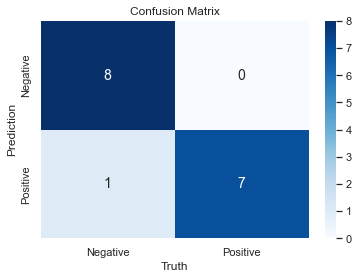

In [377]:
y_pred_prob = 0
for model_name, model in model_dict.items():
    y_pred_prob += (model.predict_proba(test_features)[:,1] * model_weights[model_name])

y_pred_prob += (simple_nn.predict(test_features.todense()).ravel() * model_weights['simple_nn'])
y_pred_prob /= sum(model_weights.values())
print_model_metrics(y_test, y_pred_prob, confusion = True)

In [378]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_prob, pos_label = 1)
    
#Find the threshold value that gives the best F1 Score
best_f1_index =np.argmax([calc_f1(p_r) for p_r in zip(precision, recall)])
best_threshold, best_precision, best_recall = threshold[best_f1_index], precision[best_f1_index], recall[best_f1_index]

# Calulcate predictions based on the threshold value
y_test_pred = np.where(y_test_prob > best_threshold, 1, 0)

### Extraversion

In [383]:
y_train = np.where(train.extra_bin.values == 1, 1, 0)
y_test = np.where(test.extra_bin.values == 1, 1, 0)

lr = SGDClassifier(loss = 'log', alpha = 0.01, penalty = 'l2', l1_ratio=0.75) # Best Parameters : {'alpha': 0.01, 'l1_ratio': 0.75, 'penalty': 'l2'}
#svm = SVC(C = 10, kernel = 'poly', degree = 2, probability = True)
nb = MultinomialNB(alpha = 1000, class_prior = [0.5, 0.5])  # Best Parameters : {'alpha': 1000}
#knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', n_jobs = -1)
#rf = RandomForestClassifier(n_estimators = 250, min_samples_split = 5, max_depth = 15,  n_jobs = -1)
xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.01, max_depth = 2, n_jobs = -1, reg_alpha=0) # Best Parameters : {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'reg_alpha': 0}

model_dict = dict(zip(['LR', 'NB', 'XGB'], [lr, nb, xgb]))

for model_name, model in model_dict.items():
    print('Training {}'.format(model_name))
    model.fit(train_features, y_train)

model_weights = {'LR': 0.42234642417127055, 'NB': 0.4441136472771504, 'XGB': 0.5905951355210783, 'simple_nn': 0.017447231602179536}



y_pred_prob = 0

for model_name, model in model_dict.items():
    y_pred_prob += (model.predict_proba(test_features)[:,1] * model_weights[model_name])

y_pred_prob += (simple_nn.predict(test_features.todense()).ravel() * model_weights['simple_nn'])
y_pred_prob /= sum(model_weights.values())

print_model_metrics(y_test, y_pred_prob)

Training LR
Training NB
Training XGB
1/1 [==============================] - 0s 18ms/step
F1: 0.923 | Pr: 1.000 | Re: 1.000 | AUC: 1.000 | Accuracy: 0.938 



In [381]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

trials = Trials()
model_weights = fmin(run_voting_clf,
    space= {
        'LR' : hp.uniform('LR', 0, 1),
      #  'SVM' : hp.uniform('SVM', 0, 1),
        'NB' : hp.uniform('NB', 0, 1),
      #  'KNN' : hp.uniform('KNN', 0, 1),
      #  'RF' : hp.uniform('RF', 0, 1),
        'XGB' : hp.uniform('XGB', 0, 1),
        'simple_nn' : hp.uniform('simple_nn', 0, 1),


    },
    algo=tpe.suggest,
    max_evals=500,
    trials = trials)

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms

In [382]:
print(model_weights)

{'LR': 0.42234642417127055, 'NB': 0.4441136472771504, 'XGB': 0.5905951355210783, 'simple_nn': 0.017447231602179536}


1/1 [==============================] - 0s 19ms/step
F1: 0.923 | Pr: 1.000 | Re: 1.000 | AUC: 1.000 | Accuracy: 0.938 



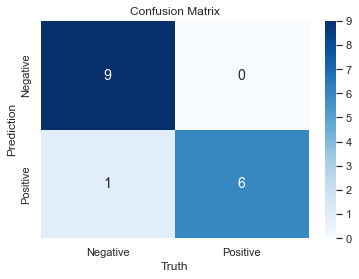

In [384]:
y_pred_prob = 0
for model_name, model in model_dict.items():
    y_pred_prob += (model.predict_proba(test_features)[:,1] * model_weights[model_name])

y_pred_prob += (simple_nn.predict(test_features.todense()).ravel() * model_weights['simple_nn'])
y_pred_prob /= sum(model_weights.values())
print_model_metrics(y_test, y_pred_prob, confusion = True)

### Openness

In [453]:
y_train = np.where(train.off_bin.values == 1, 1, 0)
y_test = np.where(test.off_bin.values == 1, 1, 0)

lr = SGDClassifier(loss = 'log', alpha = 0.1, penalty = 'l2', l1_ratio = 0.15) # LR Best Parameters : {'alpha': 0.1, 'l1_ratio': 0.15, 'penalty': 'l2'}
#svm = SVC(C = 0.1, kernel = 'poly', probability = True, degree=2) # SVM Best Parameters : {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
#nb = MultinomialNB(alpha = 10, class_prior = [0.5, 0.5]) # NB Best Parameters : {'alpha': 10}
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', n_jobs = -1) # KNN Best Parameters : {'n_neighbors': 15, 'weights': 'distance'}
#rf = RandomForestClassifier(n_estimators = 250, min_samples_split = 5, max_depth = None,  n_jobs = -1) # RF Best Parameters : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 250}
xgb = XGBClassifier(n_estimators = 10, learning_rate = 0.2, max_depth = 2, reg_alpha= 0, n_jobs = -1) # XGB Best Parameters : {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 10, 'reg_alpha': 0}


model_dict = dict(zip(['LR',  'KNN',  'XGB'], [lr, svm,knn, xgb]))

for model_name, model in model_dict.items():
    print('Training {}'.format(model_name))
    model.fit(train_features, y_train)

model_weights = {'KNN': 0.03159197832515831, 'LR': 0.049386030373294976, 'NB': 0.8664655943793312, 'XGB': 0.19582835088530137, 'simple_nn': 0.9540182118677278}





y_pred_prob = 0

for model_name, model in model_dict.items():
    y_pred_prob += (model.predict_proba(test_features)[:,1] * model_weights[model_name])

y_pred_prob += (simple_nn.predict(test_features.todense()).ravel() * model_weights['simple_nn'])
y_pred_prob /= sum(model_weights.values())

print_model_metrics(y_test, y_pred_prob)

Training LR
Training KNN
Training XGB
1/1 [==============================] - 0s 16ms/step
F1: 0.667 | Pr: 0.583 | Re: 1.000 | AUC: 0.651 | Accuracy: 0.625 



In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

trials = Trials()
model_weights = fmin(run_voting_clf,
    space= {
        'LR' : hp.uniform('LR', 0, 1),
       # 'SVM' : hp.uniform('SVM', 0, 1),
        'NB' : hp.uniform('NB', 0, 1),
        'KNN' : hp.uniform('KNN', 0, 1),
        #'RF' : hp.uniform('RF', 0, 1),
        'XGB' : hp.uniform('XGB', 0, 1),
        'simple_nn' : hp.uniform('simple_nn', 0, 1),


    },
    algo=tpe.suggest,
    max_evals=500,
    trials = trials)

In [448]:
print(model_weights)

{'KNN': 0.03159197832515831, 'LR': 0.049386030373294976, 'NB': 0.8664655943793312, 'XGB': 0.19582835088530137, 'simple_nn': 0.9540182118677278}


### Agreeableness

In [464]:
y_train = np.where(train.ver_bin.values == 1, 1, 0)
y_test = np.where(test.ver_bin.values == 1, 1, 0)

lr = SGDClassifier(loss = 'log', alpha = 1, penalty = 'l2', l1_ratio = 0.15) # Best Parameters : {'alpha': 1, 'l1_ratio': 0.15, 'penalty': 'l2'}
#svm = SVC(C = 0.1, kernel = 'poly', probability = True, degree=2) # SVM Best Parameters : {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
nb = MultinomialNB(alpha = 1, class_prior = [0.5, 0.5]) # NB Best Parameters : {'alpha': 10} # Best Parameters : {'alpha': 1}
knn = KNeighborsClassifier(n_neighbors = 31, weights = 'distance', n_jobs = -1) # Best Parameters : {'n_neighbors': 31, 'weights': 'distance'}
#rf = RandomForestClassifier(n_estimators = 250, min_samples_split = 5, max_depth = None,  n_jobs = -1) # RF Best Parameters : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 250}
xgb = XGBClassifier(n_estimators = 10, learning_rate = 0.1, max_depth = 2, reg_alpha= 0, n_jobs = -1) # Best Parameters : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10, 'reg_alpha': 0}


model_dict = dict(zip(['LR', 'NB',  'KNN',  'XGB'], [lr, nb, knn, xgb]))

for model_name, model in model_dict.items():
    print('Training {}'.format(model_name))
    model.fit(train_features, y_train)

model_weights = {'KNN': 0.8393857424283167, 'LR': 0.04990509269495902, 'NB': 0.9763988380272601, 'XGB': 0.019133732881835952, 'simple_nn': 0.33726565399533226}





y_pred_prob = 0

for model_name, model in model_dict.items():
    y_pred_prob += (model.predict_proba(test_features)[:,1] * model_weights[model_name])

y_pred_prob += (simple_nn.predict(test_features.todense()).ravel() * model_weights['simple_nn'])
y_pred_prob /= sum(model_weights.values())

print_model_metrics(y_test, y_pred_prob)

Training LR
Training NB
Training KNN
Training XGB
1/1 [==============================] - 0s 21ms/step
F1: 0.818 | Pr: 0.769 | Re: 1.000 | AUC: 0.750 | Accuracy: 0.750 



In [461]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

trials = Trials()
model_weights = fmin(run_voting_clf,
    space= {
        'LR' : hp.uniform('LR', 0, 1),
       # 'SVM' : hp.uniform('SVM', 0, 1),
        'NB' : hp.uniform('NB', 0, 1),
        'KNN' : hp.uniform('KNN', 0, 1),
        #'RF' : hp.uniform('RF', 0, 1),
        'XGB' : hp.uniform('XGB', 0, 1),
        'simple_nn' : hp.uniform('simple_nn', 0, 1),


    },
    algo=tpe.suggest,
    max_evals=500,
    trials = trials)

print(model_weights)

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 23ms/step

  1%|▍                                               | 4/500 [00:00<00:38, 13.00trial/s, best loss: -0.761904761904762]

C:\Users\Max\utility.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return (2 * p * r) / (p + r)

C:\Users\Max\utility.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return (2 * p * r) / (p + r)



1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

  3%|█▍                                            | 16/500 [00:01<00:36, 13.39trial/s, best loss: -0.8181818181818182]

C:\Users\Max\utility.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return (2 * p * r) / (p + r)



1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms

C:\Users\Max\utility.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return (2 * p * r) / (p + r)



1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms

C:\Users\Max\utility.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return (2 * p * r) / (p + r)



1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms

### Conscientousness

In [472]:
y_train = np.where(train.gew_bin.values == 1, 1, 0)
y_test = np.where(test.gew_bin.values == 1, 1, 0)

lr = SGDClassifier(loss = 'log', alpha = 0.1, penalty = 'elasticnet', l1_ratio = 0.15) # Best Parameters : {'alpha': 0.1, 'l1_ratio': 0.25, 'penalty': 'elasticnet'}
#svm = SVC(C = 0.1, kernel = 'poly', probability = True, degree=2) # SVM Best Parameters : {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
nb = MultinomialNB(alpha = 1, class_prior = [0.5, 0.5]) # Best Parameters : {'alpha': 1}
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', n_jobs = -1) # knn: Best Parameters : {'n_neighbors': 5, 'weights': 'uniform'}
#rf = RandomForestClassifier(n_estimators = 250, min_samples_split = 5, max_depth = None,  n_jobs = -1) # RF Best Parameters : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 250}
xgb = XGBClassifier(n_estimators = 10, learning_rate = 0.2, max_depth = 3, reg_alpha= 0, n_jobs = -1) # Best Parameters : {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 10, 'reg_alpha': 0}


model_dict = dict(zip(['LR', 'NB', 'KNN', 'XGB'], [lr, nb, knn, xgb]))

for model_name, model in model_dict.items():
    print('Training {}'.format(model_name))
    model.fit(train_features, y_train)

model_weights = {'KNN': 0.005965958019401141, 'LR': 0.026904011305799044, 'NB': 0.0072188933268181755, 'XGB': 0.9962997977809199, 'simple_nn': 0.33654868068636934}



y_pred_prob = 0

for model_name, model in model_dict.items():
    y_pred_prob += (model.predict_proba(test_features)[:,1] * model_weights[model_name])

y_pred_prob += (simple_nn.predict(test_features.todense()).ravel() * model_weights['simple_nn'])
y_pred_prob /= sum(model_weights.values())

print_model_metrics(y_test, y_pred_prob)


Training LR
Training NB
Training KNN
Training XGB
1/1 [==============================] - 0s 19ms/step
F1: 0.727 | Pr: 0.643 | Re: 1.000 | AUC: 0.603 | Accuracy: 0.625 



In [470]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

trials = Trials()
model_weights = fmin(run_voting_clf,
    space= {
        'LR' : hp.uniform('LR', 0, 1),
     #   'SVM' : hp.uniform('SVM', 0, 1),
        'NB' : hp.uniform('NB', 0, 1),
        'KNN' : hp.uniform('KNN', 0, 1),
    #    'RF' : hp.uniform('RF', 0, 1),
        'XGB' : hp.uniform('XGB', 0, 1),
        'simple_nn' : hp.uniform('simple_nn', 0, 1),


    },
    algo=tpe.suggest,
    max_evals=500,
    trials = trials)



1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 31ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 22ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 19ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 20ms/step

1/1 [==============================] - 0s 21ms

In [471]:
print(model_weights)

{'KNN': 0.005965958019401141, 'LR': 0.026904011305799044, 'NB': 0.0072188933268181755, 'XGB': 0.9962997977809199, 'simple_nn': 0.33654868068636934}


1/1 [==============================] - 0s 19ms/step
F1: 0.727 | Pr: 0.643 | Re: 1.000 | AUC: 0.603 | Accuracy: 0.625 



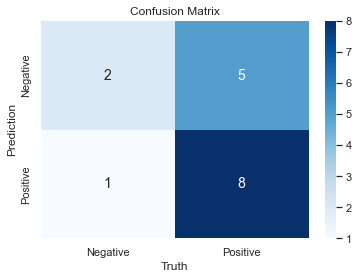

In [473]:
y_pred_prob = 0
for model_name, model in model_dict.items():
    y_pred_prob += (model.predict_proba(test_features)[:,1] * model_weights[model_name])

y_pred_prob += (simple_nn.predict(test_features.todense()).ravel() * model_weights['simple_nn'])
y_pred_prob /= sum(model_weights.values())
print_model_metrics(y_test, y_pred_prob, confusion = True)